# Import modules

In [18]:
from lacbox.io import load_pwr, load_ind, load_inds
from lacbox.test import test_data_path
import matplotlib.pyplot as plt
from pathlib import Path
from lacbox.io import load_ae
import numpy as np
from Assignment_1.Assignment_1.Part_2_aero_design_functions import single_point_design, get_design_functions





In [19]:
# # Define the list of paths
# res_path = Path.cwd().parent.parent / 'res_hawc2s'
# print(res_path)
# 
# ind_paths = [
#     res_path / 'BB_redesign_hawc2s_multitsr_u8000.ind',
#     res_path / 'BB_redesign_hawc2s_multitsr_u8001.ind',
#     res_path / 'BB_redesign_hawc2s_multitsr_u8002.ind',
#     res_path / 'BB_redesign_hawc2s_multitsr_u8003.ind',
#     res_path / 'BB_redesign_hawc2s_multitsr_u8004.ind',
#     res_path / 'BB_redesign_hawc2s_multitsr_u8005.ind',
#     # res_path / 'BB_redesign_hawc2s_multitsr_u8006.ind',
#     res_path / 'BB_redesign_hawc2s_multitsr_u8007.ind',
#     res_path / 'BB_redesign_hawc2s_multitsr_u8008.ind',
#     res_path / 'BB_redesign_hawc2s_multitsr_u8009.ind',
#     res_path / 'BB_redesign_hawc2s_multitsr_u8010.ind',
#     res_path / 'BB_redesign_hawc2s_multitsr_u8011.ind',
#     res_path / 'BB_redesign_hawc2s_multitsr_u8012.ind',
# ]

In [20]:
# # Number of subplots (3 rows, 2 columns)
# n_rows, n_cols = 4, 2
# 
# # Create a figure and a set of subplots
# fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 12))
# 
# for ind_path in ind_paths:
#     ind_data = load_ind(ind_path)
# 
#     # Extracting wind speed from the filename
#     wind_speed = ind_path.stem.split('_u')[1]  # Extracts the part after '__u'
#     wind_speed = f'U = {wind_speed[:1]}.{wind_speed[1:]} m/s'  # Format as U = x.xxx m/s
# 
#     # Plotting each parameter on the same subplot
#     axs[0, 0].plot(ind_data["s_m"], ind_data["a"], label=wind_speed)
#     axs[0, 1].plot(ind_data["s_m"], ind_data["ap"], label=wind_speed)
#     axs[1, 0].plot(ind_data["s_m"], ind_data["Cl"], label=wind_speed)
#     axs[1, 1].plot(ind_data["s_m"], ind_data["Cd"], label=wind_speed)
#     axs[2, 0].plot(ind_data["s_m"], ind_data["CP"], label=wind_speed)
#     axs[2, 1].plot(ind_data["s_m"], ind_data["CT"], label=wind_speed)
#     axs[3, 0].plot(ind_data["s_m"], ind_data["aoa_rad"], label=wind_speed)
#     axs[3, 1].plot(ind_data["s_m"], ind_data["flow_angle_rad"], label=wind_speed)
# 
# # Setting labels for all subplots
# axs[0, 0].set_ylabel("ax.-ind. ($a$) [-]")
# axs[0, 1].set_ylabel("tan.-ind. ($a_p$) [-]")
# axs[1, 0].set_ylabel("$C_l$ [-]")
# axs[1, 1].set_ylabel("$C_d$ [-]")
# axs[2, 0].set_ylabel("Blade-span ($s$) [m]")
# axs[2, 0].set_ylabel("local-$C_P$ [-]")
# axs[2, 1].set_ylabel("Blade-span ($s$) [m]")
# axs[2, 1].set_ylabel("local-$C_T$ [-]")
# 
# # Add legends to each subplot
# for ax in axs.flat:
#     ax.tick_params(axis='both', bottom=True, top=True, left=True, right=True, direction='in', which='major')
#     ax.grid(linestyle='--', linewidth=1, alpha=0.7)
# 
# ax.legend()
# # Adjust layout for better spacing
# plt.tight_layout()
# plt.show()

In [21]:
# Plotting power for multiple tsr

# Path for the file
pwr_path = Path.cwd().parent / 'res_hawc2s' / 'BB_redesign_compute_rigid_opt.pwr' 
# Load the data
pwr_data = load_pwr(pwr_path)
# Print the names in the dict
pwr_data.keys()


dict_keys(['V_ms', 'P_kW', 'T_kN', 'Cp', 'Ct', 'Pitch_Q_Nm', 'Flap_M_kNm', 'Edge_M_kNm', 'Pitch_deg', 'Speed_rpm', 'Tip_x_m', 'Tip_y_m', 'Tip_z_m', 'J_rot_kgm2', 'J_DT_kgm2', 'Torsion_rad', 'Torque_kNm'])

<>:11: SyntaxWarning: invalid escape sequence '\o'
<>:15: SyntaxWarning: invalid escape sequence '\o'
<>:11: SyntaxWarning: invalid escape sequence '\o'
<>:15: SyntaxWarning: invalid escape sequence '\o'
C:\Users\jimwi\AppData\Local\Temp\ipykernel_3200\1915625111.py:11: SyntaxWarning: invalid escape sequence '\o'
  axs[1, 0].set_xlabel("Rotor-speed $\omega$ [m/s]")
C:\Users\jimwi\AppData\Local\Temp\ipykernel_3200\1915625111.py:15: SyntaxWarning: invalid escape sequence '\o'
  axs[1, 1].set_xlabel("Rotor-speed $\omega$ [m/s]")


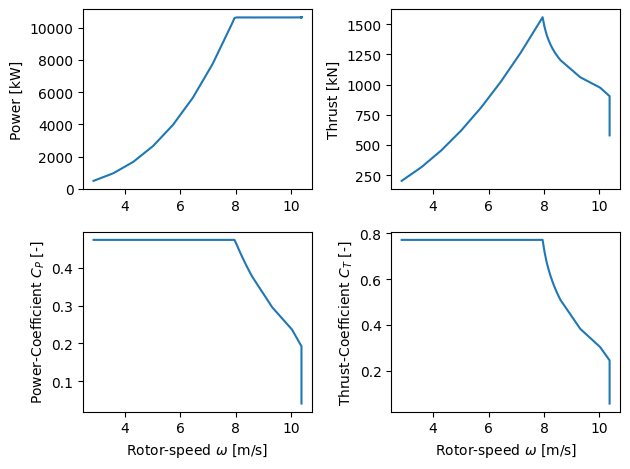

In [22]:
fig, axs = plt.subplots(2, 2)

# Power
axs[0, 0].plot(pwr_data["Speed_rpm"], pwr_data["P_kW"])
axs[0, 0].set_ylabel("Power [kW]")
# Thrust
axs[0, 1].plot(pwr_data["Speed_rpm"], pwr_data["T_kN"])
axs[0, 1].set_ylabel("Thrust [kN]")
# CP
axs[1, 0].plot(pwr_data["Speed_rpm"], pwr_data["Cp"])
axs[1, 0].set_xlabel("Rotor-speed $\omega$ [m/s]")
axs[1, 0].set_ylabel("Power-Coefficient $C_P$ [-]")
# CT
axs[1, 1].plot(pwr_data["Speed_rpm"], pwr_data["Ct"])
axs[1, 1].set_xlabel("Rotor-speed $\omega$ [m/s]")
axs[1, 1].set_ylabel("Thrust-Coefficient $C_T$ [-]")

fig.tight_layout()

In [23]:
# # Side-by-side plots of the HAWC2S lift coefficient and the design lift coefficient versus relative thickness (left plot) and versus radius (right plot) for design pitch and design TSR
# 
# BB_ind_file_path = Path.cwd().parent.parent / 'res_hawc2s' / 'BB_redesign_hawc2s_multitsr_u8013.ind'
# 
# # Load the data
# ind_data = load_ind(BB_ind_file_path)
# # Print the names in the dict
# print(ind_data.keys())
# 
# print(ind_data['s_m'])
# print(ind_data['Cl'])

In [24]:

ae_path = Path.cwd().parent.parent / 'data'  / 'DTU_10MW_RWT_ae.dat'
ae = load_ae(ae_path)
r, chord_list, tc_list, pcset = load_ae(ae_path, unpack=True)

Cl_interpolated = np.interp(r, ind_data["s_m"], ind_data["Cl"])

print(Cl_interpolated)


FileNotFoundError: C:\Users\jimwi\PycharmProjects\LAC\LAC\data\DTU_10MW_RWT_ae.dat not found.

In [ ]:
scale_ratio_blade = 1.0388359746215876

ae_path = test_data_path + '/dtu_10_mw/data/DTU_10MW_RWT_ae.dat'

ae = load_ae(ae_path)

# Read new design data
r, c_10mw, tc_10mw, pcset = load_ae(ae_path, unpack=True)

r_blade = r * scale_ratio_blade

cl_des, cd_des, aoa_des, tc_vals, cl_vals, cd_vals, aoa_vals = get_design_functions(2)

cl_design_r = np.loadtxt('Cl_single_point_design')

tc = np.arange(0,100)
cl_design = cl_des(tc)

print(Cl_interpolated)
print(tc_list)

plt.plot(tc,cl_design,label='Design function')
plt.plot(tc_list,Cl_interpolated,label='Hawc2s')
plt.ylabel("$C_l$ [-]")
plt.xlabel('t/c [-]')
plt.legend()
plt.tick_params(axis='both',bottom=True, top=True, left=True, right=True, direction='in', which='major')
plt.grid(linestyle='--', linewidth=1, alpha=0.7)
plt.figure(figsize=(5, 3))
plt.savefig(Path.cwd().parent / 'Plots/Cl_tc_hawc2s.pdf')
plt.show()

plt.plot(ind_data["s_m"], ind_data["Cl"],label='Hawc2s')
plt.plot(r_blade[:-1],cl_design_r, label='Design function')
plt.ylabel("$C_l$ [-]")
plt.xlabel('r [m]')
plt.legend()
plt.tick_params(axis='both',bottom=True, top=True, left=True, right=True, direction='in', which='major')
plt.grid(linestyle='--', linewidth=1, alpha=0.7)
plt.figure(figsize=(5, 3))
plt.savefig(Path.cwd().parent / 'Plots/Cl_r_hawc2s.pdf')
plt.show()

# plt.plot(ind_data["s_m"], ind_data["aoa_rad"]*180/(2*np.pi),label='Hawc2s')
# plt.plot(r_blade[:-1],cl_design_r, label='Design function')
# plt.ylabel("$\\alpha$ [-]")
# plt.xlabel('r [m]')
# plt.legend()
# plt.tick_params(axis='both',bottom=True, top=True, left=True, right=True, direction='in', which='major')
# plt.grid(linestyle='--', linewidth=1, alpha=0.7)
# plt.figure(figsize=(5, 3))
# # plt.savefig(Path.cwd().parent / 'Plots/Cl_r_hawc2s.pdf')
# plt.show()


In [ ]:
# plt.plot(ind_data["s_m"], ind_data["Cl"],label='Hawc2s')
# plt.plot(r,cl_design_r, label='Design function')
# plt.ylabel("$C_l$ [-]")
# plt.xlabel('r [m]')
# plt.legend()
# plt.tick_params(axis='both',bottom=True, top=True, left=True, right=True, direction='in', which='major')
# plt.grid(linestyle='--', linewidth=1, alpha=0.7)
# plt.figure(figsize=(5, 3))
# plt.savefig(Path.cwd().parent / 'Plots/Cl_r_hawc2s.pdf')
# plt.show()

In [ ]:
#Plots of the HAWC2S lift coefficient, lift-drag ratio, AoA, axial induction (a), local CT and local CP versus radius at design TSR.

ind_data_path = Path.cwd().parent.parent / 'res_hawc2s' /'BB_redesign_hawc2s_multitsr_compute_rigid_opt_u8000.ind'

ind_data_hawc2s = load_ind(ind_data_path)
# Print the names in the dict
ind_data_hawc2s.keys()



In [ ]:
plt.plot(ind_data['s_m'],ind_data['a'])
plt.xlabel('r [m]')
plt.ylabel('a [-]')
plt.tick_params(axis='both',bottom=True, top=True, left=True, right=True, direction='in', which='major')
plt.grid(linestyle='--', linewidth=1, alpha=0.7)
plt.figure(figsize=(5, 3))
plt.savefig(Path.cwd().parent / 'Plots/a_r_hawc2s.pdf')
plt.show()

In [ ]:
plt.plot(ind_data['s_m'],ind_data['Cl'])
plt.xlabel('r [m]')
plt.ylabel('$C_l$ [-]')
plt.tick_params(axis='both',bottom=True, top=True, left=True, right=True, direction='in', which='major')
plt.grid(linestyle='--', linewidth=1, alpha=0.7)
plt.figure(figsize=(5, 3))
plt.savefig(Path.cwd().parent / 'Plots/Cl_r_hawc2s.pdf')
plt.show()

In [ ]:
plt.plot(ind_data['s_m'],ind_data['Cl']/ind_data['Cd'])
plt.xlabel('r [m]')
plt.ylabel('$C_l/C_d$ [-]')
plt.tick_params(axis='both',bottom=True, top=True, left=True, right=True, direction='in', which='major')
plt.grid(linestyle='--', linewidth=1, alpha=0.7)
plt.figure(figsize=(5, 3))
plt.savefig(Path.cwd().parent / 'Plots/ClCd_r_hawc2s.pdf')
plt.show()

In [ ]:
plt.plot(ind_data['s_m'],ind_data['aoa_rad']/(2*np.pi)*180)
plt.xlabel('r [m]')
plt.ylabel('$\\alpha$ [deg]')
plt.tick_params(axis='both',bottom=True, top=True, left=True, right=True, direction='in', which='major')
plt.grid(linestyle='--', linewidth=1, alpha=0.7)
plt.figure(figsize=(5, 3))
plt.savefig(Path.cwd().parent / 'Plots/aoa_r_hawc2s.pdf')
plt.show()

In [ ]:
plt.plot(ind_data['s_m'],ind_data['CT'])
plt.xlabel('r [m]')
plt.ylabel('$C_T$ [-]')
plt.tick_params(axis='both',bottom=True, top=True, left=True, right=True, direction='in', which='major')
plt.grid(linestyle='--', linewidth=1, alpha=0.7)
plt.figure(figsize=(5, 3))
plt.savefig(Path.cwd().parent / 'Plots/CT_r_hawc2s.pdf')
plt.show()

In [ ]:
plt.plot(ind_data['s_m'], ind_data['CP'])
plt.xlabel('r [m]')
plt.ylabel('$C_P$ [-]')
plt.tick_params(axis='both', bottom=True, top=True, left=True, right=True, direction='in', which='major')
plt.grid(linestyle='--', linewidth=1, alpha=0.7)
plt.figure(figsize=(5, 3))
plt.savefig(Path.cwd().parent / 'Plots/CP_r_hawc2s.pdf')
plt.show()